# Computer Vision with TensorFlow

In this Jupyter Notebook we will be running through a number of TensorFlow computer vision related tutorials. Note that the header serves as a link to each tutorial. We will be changin certain things in the tutorials for experimentation and learning, but will stay true to the general idea.

In [2]:
#Imports and setting up
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## [Convolutional Neural Network](https://www.tensorflow.org/tutorials/images/cnn)

In this tutorial we are building a convolutional neural network to classify images from the CIFAR10 dataset. This dataset has 10 classes of low resolution images.

In [2]:
#Loading the dataset
train, test = datasets.cifar10.load_data()

trainI, trainL = train
testI, testL = test

170500096/170498071 [==============================] - 16s 0us/step


In [5]:
print('Train Images:', trainI.shape)
print('Test Images:', testI.shape)

Train Images: (50000, 32, 32, 3)
Test Images: (10000, 32, 32, 3)


We can see that we have 50,000 training images and 10000 test images. We note that all of the images are RGB and thus have three channels, although the resolution is only 32x32.

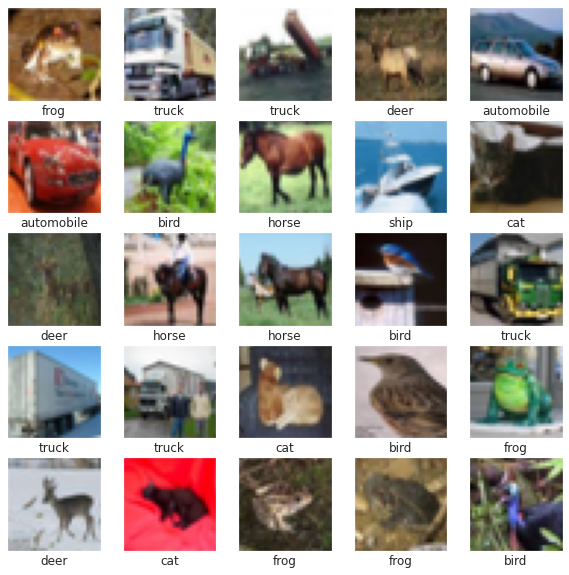

In [19]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
          'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainI[i], cmap=plt.cm.binary)
    plt.xlabel(classes[trainL[i][0]])
    
plt.show()

In the plot above we see the first 25 training images, and we note that because of the low resolution they are all pretty blurry.

We then define our neural network model below, and we note we have made significant changes to the one prescribed in the tutorial. Notably, we have added a 1x1 convolution at the beginning, batch norm layers throughout, and a global average pooling near the end.

In [53]:
#Defining our model
model = models.Sequential([
    layers.Input((trainI[0].shape)),
    
    #This first layer rescales the image
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, (1,1), activation='relu'),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='relu')
])

model.summary() #Print model summary
tf.config.list_physical_devices('GPU') #Check if GPU is enabled

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_16 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_36 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_37 (Batc (None, 13, 13, 64)      

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Looking at the model summary above, we can note that we have roughly half as many parameters as the tutorial model which had $\sim122,000$. This is mostly due to the fact that we only have the one dense layer at the end and are using global average pooling to down sample.

In [54]:
#Compile the model and train using adam algorithm
model.compile(optimizer='adam',
             loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(trainI, trainL, epochs=10,
                   validation_data=test)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4157 - accuracy: 0.4999 - val_loss: 1.3117 - val_accuracy: 0.5292
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9825 - accuracy: 0.6547 - val_loss: 1.1656 - val_accuracy: 0.5870
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8515 - accuracy: 0.7040 - val_loss: 1.0854 - val_accuracy: 0.6237
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7583 - accuracy: 0.7344 - val_loss: 0.7947 - val_accuracy: 0.7279
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7002 - accuracy: 0.7564 - val_loss: 0.8088 - val_accuracy: 0.7237
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6492 - accuracy: 0.7754 - val_loss: 0.8519 - val_accuracy: 0.7159
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6063 - accuracy: 0.7911 - val_loss: 0.8011 - val_ac

313/313 - 1s - loss: 0.7815 - accuracy: 0.7409


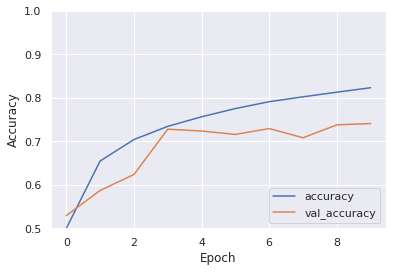

In [55]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testI, testL, verbose=2)

In the plot above we see a plot of accuracy and validation accuracy, where validation accuracy is just the accuracy during training on the test images. We note that we have achieved a final validation accuracy of about 74% as compared to the 71% for the tutorial model. This is pretty good given the savings on parameters! However, looking at the plot we can note that most of our training is complete by about the third epoch. After that the model begins to overfit to the training data and validation accuracy decreases some before the final epoch.

## [Image Classification](https://www.tensorflow.org/tutorials/images/classification)

This tutorial looks at another image classification task, this time on a flower dataset with 5 classes.

Unfortunately, this tutorial has a few problems and was not finished. In order to create the datasets as shown in the tutorial we need to use some functionality only currently available in the tf-nightly build. This isn't necessarily a problem itself, but setting up GPU support for tf-nightly was more than I was prepared to accomplish. Without the GPU support it makes training the model very slow, and so we will do everything up to that point.

In [4]:
import numpy as np
import os
import PIL

In [5]:
#Importing the data
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
print(len(list(data_dir.glob('*/*.jpg'))))

3670


We can see that we have downloaded 3,670 images.

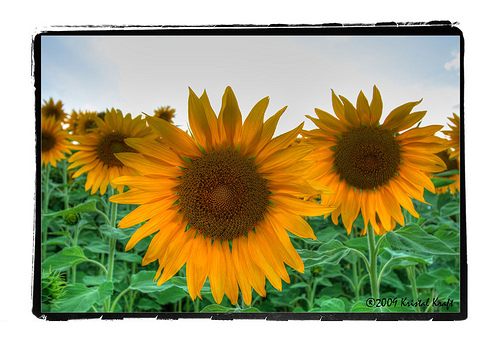

In [5]:
#Examine an image
sf = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sf[0]))

We have all these images, but now we need to turn it into a dataset for use in training a model. We will start by defining a few parameters, and notice that the images are much higher resolution at 180x180 (as can be seen in the image above).

In [6]:
batch_sz = 32
imgH = 180
imgW = 180

In [7]:
#Create a training set from the flower images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(imgH,imgW),
    batch_size=batch_sz)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
#Create a testing set from the flower images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(imgH, imgW),
  batch_size=batch_sz)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


We have five different flower types in our data set of 3670 images with a split of 80% train and 20% test.

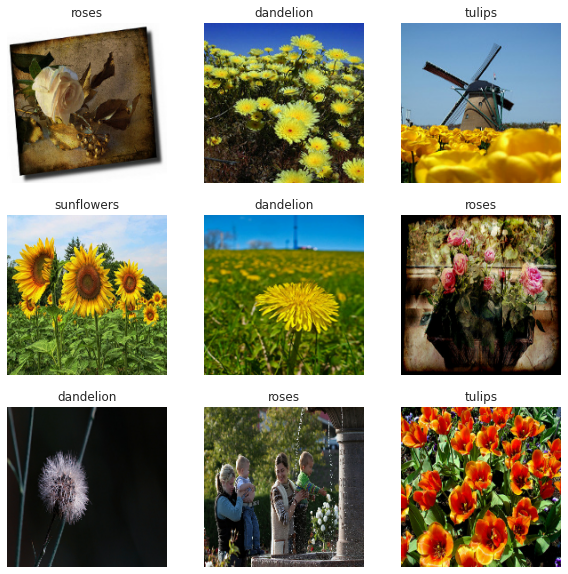

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


The images in our training set have the first dimension of their shape as 32 because that is the batch size. Each image is then 180x180 RGB.

Dataset I/O can be a large bottleneck in neural network training performance becuase it can take a lot of computation to constantly be retrieving large images from the hard drive. We will use a few Tensorflow tools to mitigate this.

In [12]:
#This will allow TensorFlow to optimize parameters specifically for
#this machine when loading the data.
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

With the data ready to go we will build our model. To do this will we use the same structure as in the previous tutorial with a few modifications.

In [13]:
#Defining our model
model = models.Sequential([
    layers.Input((imgH, imgW, 3)),
    
    #This first layer rescales the image
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 1, padding='same', activation='relu'),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(50, activation='relu'),
    layers.Dense(len(classes), activation='relu')
])

model.summary() #Print model summary
tf.config.list_physical_devices('GPU') #Check if GPU is enabled

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 64)        2

[]